In [1]:
import numpy as np

In [2]:
#drift coefficient
mu=0.1
#number of steps
n=5
#time in years
T=1
#number of simulation
M=3
#Initial Stock Price
S0=100
#volatilaity
sigma=0.3

In [3]:
dt=T/n
dt

0.2

In [4]:
sigma**2/2

0.045

In [5]:
(0.3**2)/2

0.045

In [6]:
mu-(0.3**2)/2

0.05500000000000001

In [7]:
(mu-(0.3**2/2))

0.05500000000000001

In [8]:
vealue_of_exponentail=2.718
vealue_of_exponentail**0.05500000000000001

1.056534589627283

In [9]:
f=(mu-(0.3**2/2))*dt
f

0.011000000000000003

In [10]:
np.sqrt(dt)

0.4472135954999579

In [11]:
k=np.random.normal(0, np.sqrt(dt), size=(M,n))#row=4,column=3
k

array([[ 0.26177372,  0.29683569, -0.12796878,  0.29747958, -0.13127095],
       [-0.12136521, -0.06536133, -0.00248917, -0.46038191, -0.35559085],
       [-0.21624816, -0.44790702,  0.48832992,  0.84082191, -0.14252349]])

In [12]:
o=k.T#Row3,column=4
o

array([[ 0.26177372, -0.12136521, -0.21624816],
       [ 0.29683569, -0.06536133, -0.44790702],
       [-0.12796878, -0.00248917,  0.48832992],
       [ 0.29747958, -0.46038191,  0.84082191],
       [-0.13127095, -0.35559085, -0.14252349]])

In [13]:
two=sigma*o
two,0.692414*sigma

(array([[ 0.07853212, -0.03640956, -0.06487445],
        [ 0.08905071, -0.0196084 , -0.13437211],
        [-0.03839063, -0.00074675,  0.14649898],
        [ 0.08924387, -0.13811457,  0.25224657],
        [-0.03938128, -0.10667726, -0.04275705]]),
 0.2077242)

In [14]:
r=f+two
r,0.011000000000000003+0.2077242

(array([[ 0.08953212, -0.02540956, -0.05387445],
        [ 0.10005071, -0.0086084 , -0.12337211],
        [-0.02739063,  0.01025325,  0.15749898],
        [ 0.10024387, -0.12711457,  0.26324657],
        [-0.02838128, -0.09567726, -0.03175705]]),
 0.2187242)

In [15]:
np.exp(r)

array([[1.09366246, 0.97491054, 0.94755107],
       [1.10522696, 0.99142855, 0.88393468],
       [0.97298109, 1.01030599, 1.17057956],
       [1.10544047, 0.88063277, 1.30114751],
       [0.97201768, 0.90875727, 0.96874191]])

In [16]:
np.exp(0.2187242)

1.2444879995615123

In [17]:
St=np.exp((mu - sigma ** 2 / 2) * dt+ sigma *k.T)
St

array([[1.09366246, 0.97491054, 0.94755107],
       [1.10522696, 0.99142855, 0.88393468],
       [0.97298109, 1.01030599, 1.17057956],
       [1.10544047, 0.88063277, 1.30114751],
       [0.97201768, 0.90875727, 0.96874191]])

In [18]:
st=np.vstack([np.ones(M),St])
st

array([[1.        , 1.        , 1.        ],
       [1.09366246, 0.97491054, 0.94755107],
       [1.10522696, 0.99142855, 0.88393468],
       [0.97298109, 1.01030599, 1.17057956],
       [1.10544047, 0.88063277, 1.30114751],
       [0.97201768, 0.90875727, 0.96874191]])

In [19]:
l=st.cumprod(axis=0)

In [20]:
st[1][0],st[2][0]
st[1][0]*st[2][0]

1.2087452322788308

In [21]:
np.cumprod([1,2,3])

array([1, 2, 6], dtype=int32)

In [22]:
st=100*l

In [23]:
time = np.linspace(0,T,n+1)
time

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [24]:
tt=np.full(shape=(M,n+1), fill_value=time).T
tt,st

(array([[0. , 0. , 0. ],
        [0.2, 0.2, 0.2],
        [0.4, 0.4, 0.4],
        [0.6, 0.6, 0.6],
        [0.8, 0.8, 0.8],
        [1. , 1. , 1. ]]),
 array([[100.        , 100.        , 100.        ],
        [109.36624564,  97.49105432,  94.75510666],
        [120.87452323,  96.65541427,  83.7573252 ],
        [117.60862526,  97.65154446,  98.04461279],
        [130.0093345 ,  85.99515005, 127.57050359],
        [126.37137187,  78.14871738, 123.58289347]]))

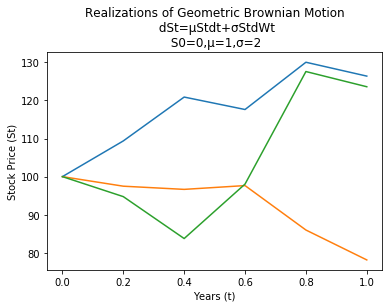

In [25]:
import matplotlib.pyplot as plt
plt.plot(tt,st)
plt.xlabel("Years (t)")
plt.ylabel("Stock Price (St)")
plt.title(
    "Realizations of Geometric Brownian Motion\n dSt=μStdt+σStdWt\n S0=0,μ=1,σ=2".format(S0, mu, sigma)
)
plt.show()